# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Завантаження даних
df = pd.read_csv('yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour


---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [2]:
df['month_year'] = df.index.to_period('M')
df['month_year']  = df.month_year.astype(str)

monthly_stats = df.groupby('month_year')['count'].agg(['mean', 'std']).reset_index()


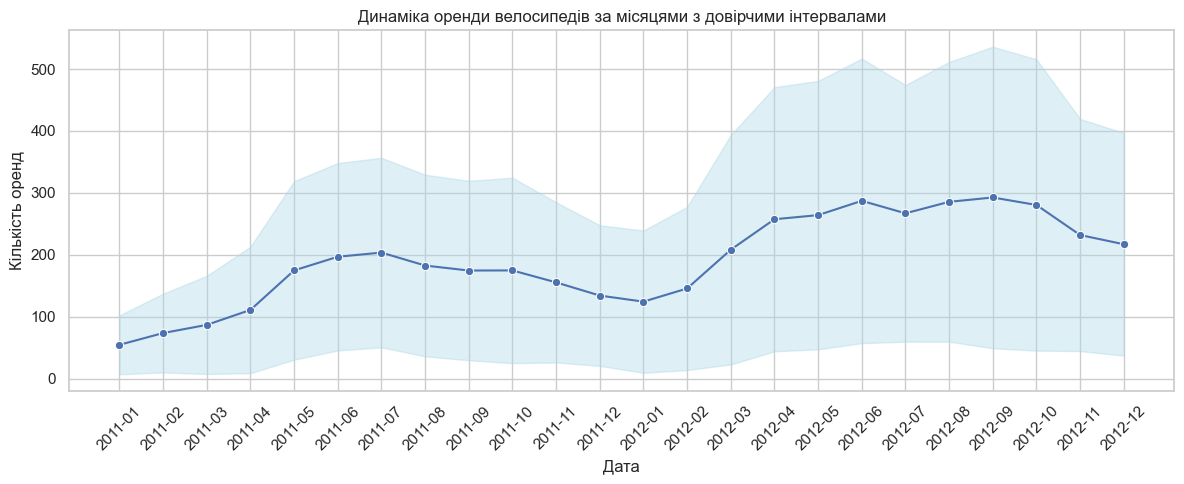

In [3]:

plt.figure(figsize = (12, 5))
sns.lineplot(data = monthly_stats, x = 'month_year', y = 'mean', marker='o',)


plt.fill_between(
    monthly_stats['month_year'],
    monthly_stats['mean'] - monthly_stats['std'],
    monthly_stats['mean'] + monthly_stats['std'],
    color='lightblue',
        alpha=0.4
)

plt.title('Динаміка оренди велосипедів за місяцями з довірчими інтервалами')
plt.xlabel('Дата')
plt.ylabel('Кількість оренд')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Найбільша невизначеність (тобто найвища варіативність у кількості оренд) спостерігається з
2012-04 по 2012-062 та з 2012-08 по 2012-10 про що свідчить найбільша ширина довірчих інтервалів.

## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами - з Pandas та Seaborn - та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної. В візуалізації Seaborn додайте параметр при побудові `kde=True`.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

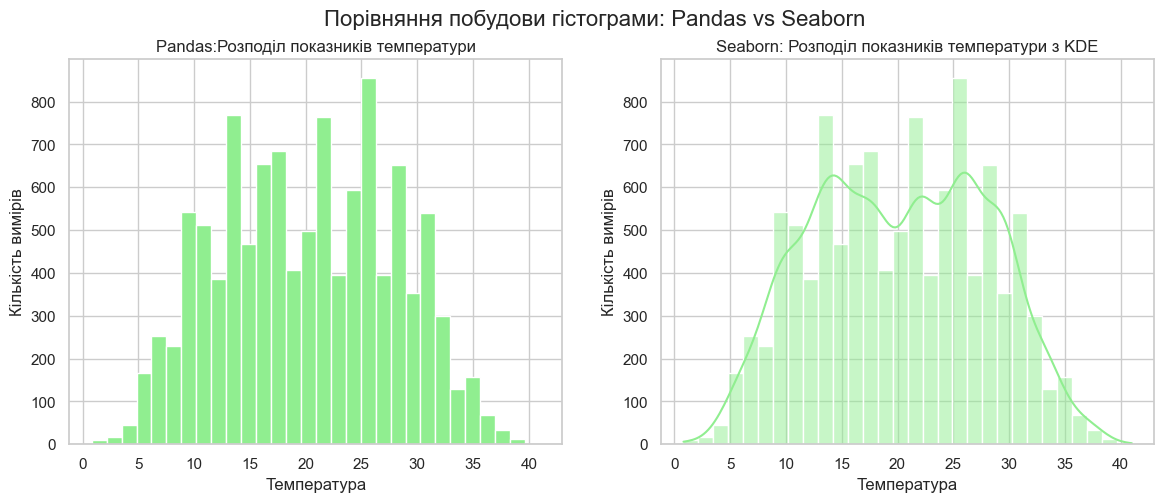

In [4]:
fig = plt.figure(figsize=(14, 5))
fig.suptitle('Порівняння побудови гістограми: Pandas vs Seaborn', fontsize=16) 

plt.subplot(1, 2, 1)
plt.hist(df['temp'], bins=30, color='lightgreen')
plt.title('Pandas:Розподіл показників температури')
plt.xlabel('Температура')
plt.ylabel('Кількість вимірів')

plt.subplot(1, 2, 2)
sns.histplot(df['temp'], bins=30, color='lightgreen',kde=True)
plt.title('Seaborn: Розподіл показників температури з KDE')
plt.xlabel('Температура')
plt.ylabel('Кількість вимірів')
plt.grid(True)




1.Seaborn має більш м'якіші, прозорий колір. Також має можливість поєднувати гістограму з додатковим графіком ( у цьому з лінією KDE).На відміну від цього, побудова з Pandas є простішою: класична гістограма без додаткових графічних елементів.
2. KDE- це згладжена лінія, яка показує, як  змінюється частота появи значень температури.

## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

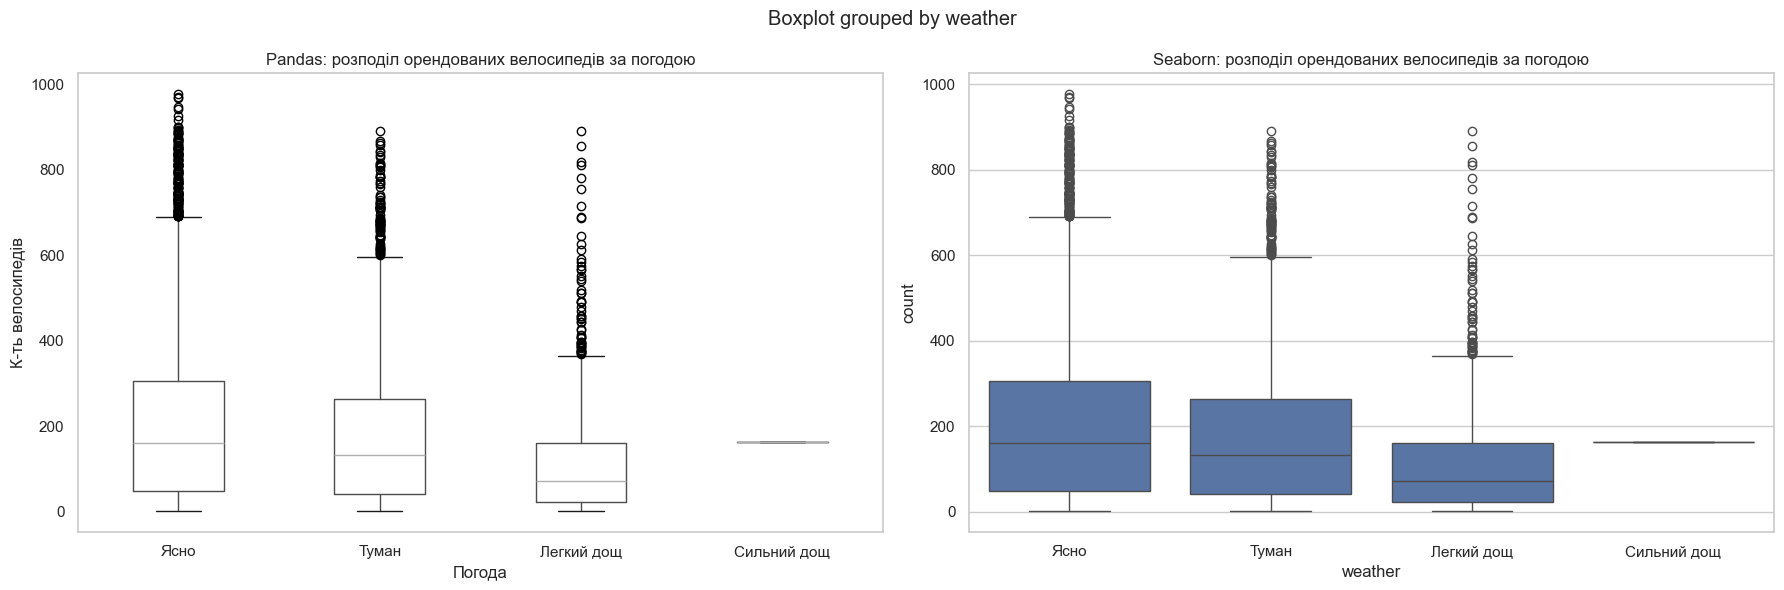

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(18,6))


labels = ['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ']

df.boxplot(
    column='count',
    by='weather',
    grid=False,
    ax=ax[0]
)
ax[0].set_title('Pandas: розподіл орендованих велосипедів за погодою')
ax[0].set_xticklabels(labels)
ax[0].set_ylabel('К-ть велосипедів')
ax[0].set_xlabel('Погода')
ax[1].set_xticks([0, 1, 2, 3])
ax[1].set_xticklabels(labels)

sns.boxplot(data=df, x='weather', y='count', ax=ax[1])
ax[1].set_title('Seaborn: розподіл орендованих велосипедів за погодою')

plt.tight_layout()
plt.show()


- Pandas box plot має більш простий, базовий стиль, відсутня сітка або кольорове оформлення. Він створений переважно для швидкого аналізу.

- Seaborn box plot виглядає сучасніше та більш інформативно. Крім основного графіку, Seaborn автоматично додає допоміжні лінії сітки, які полегшують зчитування значень по осі Y. Також Seaborn підтримує додаткові можливості — наприклад, кольори, стиль точок-викидів, згладжування, групування тощо.

<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


In [6]:
correlation = df[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()	

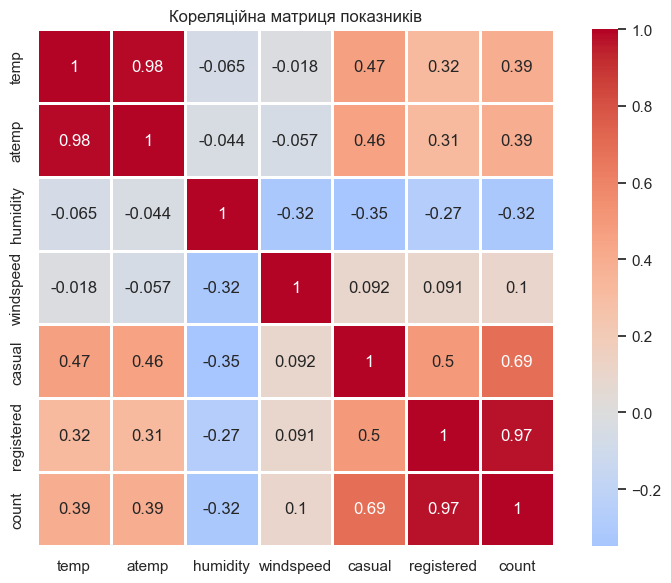

In [7]:
plt.figure(figsize=(8, 6))

sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1
            )

plt.title('Кореляційна матриця показників')
plt.tight_layout()
plt.show()

1. Змінна registered має найвищу кореляцію з count, яка становить 0.97. Це означає, що саме зареєстровані користувачі найбільше впливають на загальну кількість орендованих велосипедів.

2. Значення кореляції між temp і atemp і складає 0.98 (майже ідеальна позитивна кореляція). Це пов'язано з тим що температура та відчуття температури мають схожі дані, тому й мають таку кореляцію.

3. Негативна кореляція спостерігається між вологістю повітря (humidity) та змінними: casual: –0.35; registered: –0.27 та count: –0.32.

## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за сезонами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому сезоні найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


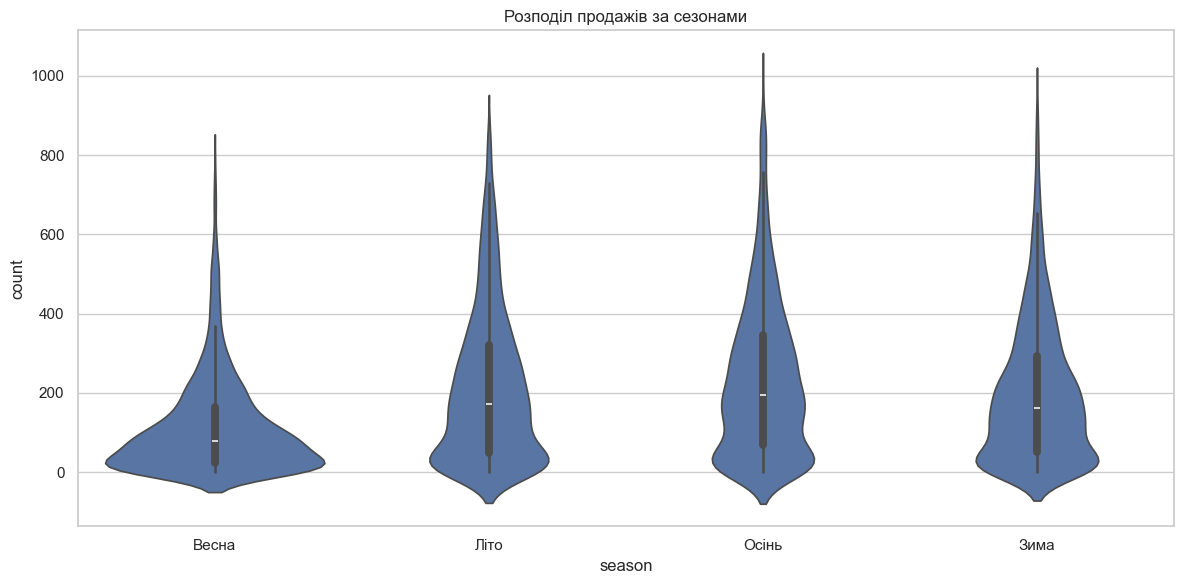

In [8]:
labels = ['Весна', 'Літо', 'Осінь', 'Зима']

plt.figure(figsize=(12, 6))
ax= sns.violinplot(data = df, x='season', y='count',
          
               )

plt.title('Розподіл продажів за сезонами')
ax.set_xticks([0, 1, 2, 3])  
ax.set_xticklabels(labels) 
plt.tight_layout()
plt.show()

1. Товщина графіка показує щільність розподілу значень. Чим ширша ділянка — тим більше значень спостерігалось у цьому діапазоні.
   
2. Найбільша варіабельність (розкид значень) спостерігається восени, про що свідчить як велика висота графіка, так і широкий розподіл значень на різних рівнях.

3. Відображає загальний розподіл даних по категоріях, дає інформацію про форму розподілу, зручніше виявляти нестандартні форми даних.

## Завдання 6: Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте сезон.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше змінюється від сезону?

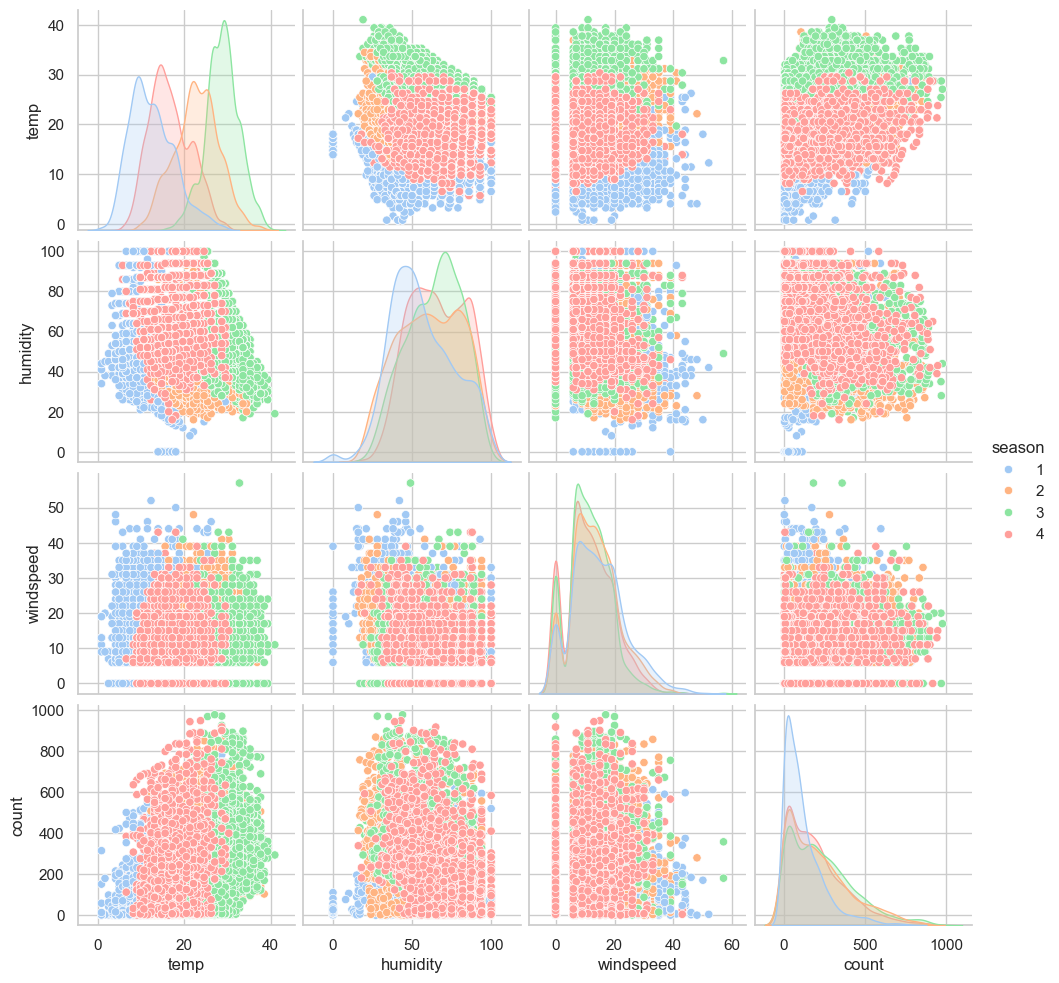

In [9]:
sns.pairplot(
    df[['temp', 'humidity', 'windspeed', 'count', 'season']],
    hue='season',
    palette='pastel'
);
plt.show()

1. Найсильніший лінійний зв'язок спостерігається між temp  та count. Точки формують чітку висхідну лінію: чим вища температура, тим більше оренд. Це свідчить про позитивну кореляцію.
2. Найбільше від сезону змінюється температура.

## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

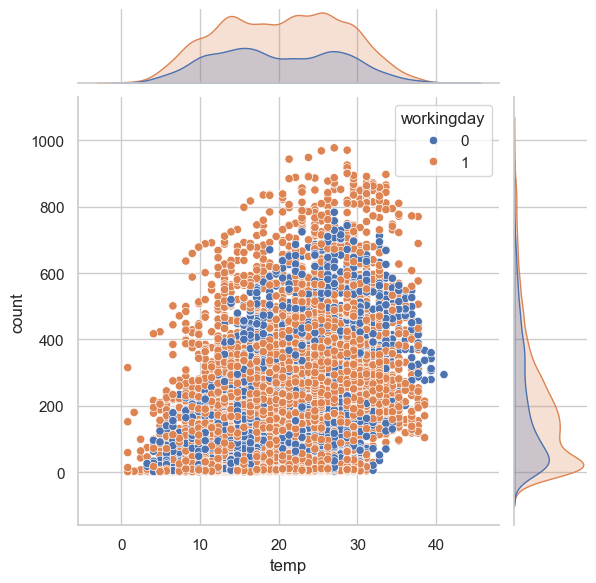

In [10]:
sns.jointplot(data=df[['temp', 'count', 'workingday']], x='temp', y='count', hue='workingday');
plt.show()

1. Графік по краях відображають щільність розподілу для кожної змінної.
2.  Так, є різниця у поведінці користувачів у робочий і неробочий день. У робочі дні оренди значно активніші, що може свідчити про використання велосипедів для поїздок на роботу.
У вихідні дні оренди менш інтенсивні та менш поширені.
